# Simple Multilinear Regression Model on Vehicle Seller Dataset



## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Importing the Dataset

In [2]:
mapping = {
    '1': 'A',
    '2': 'B',
    '3': 'C',
    '4': 'D',
    '5': 'E',
    '6': 'F',
    '7': 'G',
    '8': 'H',
    '9': 'I',
    '0': 'J',
}

dataset = pd.read_csv('cardata.csv')

def replace_digits_with_letters(word):
    result = ''
    for char in word:
        if char.isdigit():
            result += mapping[char]
        else:
            result += char
    return result

dataset['Car_Name'] = dataset['Car_Name'].apply(replace_digits_with_letters)

X = dataset.drop('Selling_Price', axis=1).values
y = dataset['Selling_Price'].values
X = pd.DataFrame(X)

In [3]:
print(X)

           0     1     2      3       4       5       6  7
0       ritz  2014  5.59  27000  Petrol  Dealer  Manual  0
1        sxD  2013  9.54  43000  Diesel  Dealer  Manual  0
2       ciaz  2017  9.85   6900  Petrol  Dealer  Manual  0
3    wagon r  2011  4.15   5200  Petrol  Dealer  Manual  0
4      swift  2014  6.87  42450  Diesel  Dealer  Manual  0
..       ...   ...   ...    ...     ...     ...     ... ..
296     city  2016  11.6  33988  Diesel  Dealer  Manual  0
297     brio  2015   5.9  60000  Petrol  Dealer  Manual  0
298     city  2009  11.0  87934  Petrol  Dealer  Manual  0
299     city  2017  12.5   9000  Diesel  Dealer  Manual  0
300     brio  2016   5.9   5464  Petrol  Dealer  Manual  0

[301 rows x 8 columns]


In [4]:
print(y)

[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  2.85  6.85
  7.5   6.1   2.25  7.75  7.25  7.75  3.25  2.65  2.85  4.9   4.4   2.5
  2.9   3.    4.15  6.    1.95  7.45  3.1   2.35  4.95  6.    5.5   2.95
  4.65  0.35  3.    2.25  5.85  2.55  1.95  5.5   1.25  7.5   2.65  1.05
  5.8   7.75 14.9  23.   18.   16.    2.75  3.6   4.5   4.75  4.1  19.99
  6.95  4.5  18.75 23.5  33.    4.75 19.75  9.25  4.35 14.25  3.95  4.5
  7.45  2.65  4.9   3.95  5.5   1.5   5.25 14.5  14.73  4.75 23.   12.5
  3.49  2.5  35.    5.9   3.45  4.75  3.8  11.25  3.51 23.    4.    5.85
 20.75 17.    7.05  9.65  1.75  1.7   1.65  1.45  1.35  1.35  1.35  1.25
  1.2   1.2   1.2   1.15  1.15  1.15  1.15  1.11  1.1   1.1   1.1   1.05
  1.05  1.05  1.05  1.    0.95  0.9   0.9   0.75  0.8   0.78  0.75  0.75
  0.75  0.72  0.65  0.65  0.65  0.65  0.6   0.6   0.6   0.6   0.6   0.6
  0.6   0.6   0.55  0.55  0.52  0.51  0.5   0.5   0.5   0.5   0.5   0.48
  0.48  0.48  0.48  0.45  0.45  0.45  0.45  0.45  0.45 

## Applying one-hot-encoding on the Dataset

In [5]:
encoder =  ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 4, 5, 6, 7])], remainder='passthrough')
X = encoder.fit_transform(X)

In [6]:
print(X)

  (0, 90)	1.0
  (0, 100)	1.0
  (0, 101)	1.0
  (0, 104)	1.0
  (0, 105)	1.0
  (0, 108)	2014.0
  (0, 109)	5.59
  (0, 110)	27000.0
  (1, 93)	1.0
  (1, 99)	1.0
  (1, 101)	1.0
  (1, 104)	1.0
  (1, 105)	1.0
  (1, 108)	2013.0
  (1, 109)	9.54
  (1, 110)	43000.0
  (2, 68)	1.0
  (2, 100)	1.0
  (2, 101)	1.0
  (2, 104)	1.0
  (2, 105)	1.0
  (2, 108)	2017.0
  (2, 109)	9.85
  (2, 110)	6900.0
  (3, 96)	1.0
  :	:
  (297, 110)	60000.0
  (298, 69)	1.0
  (298, 100)	1.0
  (298, 101)	1.0
  (298, 104)	1.0
  (298, 105)	1.0
  (298, 108)	2009.0
  (298, 109)	11.0
  (298, 110)	87934.0
  (299, 69)	1.0
  (299, 99)	1.0
  (299, 101)	1.0
  (299, 104)	1.0
  (299, 105)	1.0
  (299, 108)	2017.0
  (299, 109)	12.5
  (299, 110)	9000.0
  (300, 66)	1.0
  (300, 100)	1.0
  (300, 101)	1.0
  (300, 104)	1.0
  (300, 105)	1.0
  (300, 108)	2016.0
  (300, 109)	5.9
  (300, 110)	5464.0


## Splitting the Dataset into Training and Test Dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X_test)

  (0, 30)	1.0
  (0, 100)	1.0
  (0, 102)	1.0
  (0, 103)	1.0
  (0, 105)	1.0
  (0, 108)	2016.0
  (0, 109)	0.57
  (0, 110)	24000.0
  (1, 69)	1.0
  (1, 100)	1.0
  (1, 101)	1.0
  (1, 104)	1.0
  (1, 105)	1.0
  (1, 108)	2016.0
  (1, 109)	13.6
  (1, 110)	10980.0
  (2, 94)	1.0
  (2, 99)	1.0
  (2, 101)	1.0
  (2, 104)	1.0
  (2, 105)	1.0
  (2, 108)	2012.0
  (2, 109)	9.4
  (2, 110)	60000.0
  (3, 8)	1.0
  :	:
  (57, 110)	33988.0
  (58, 69)	1.0
  (58, 100)	1.0
  (58, 101)	1.0
  (58, 104)	1.0
  (58, 105)	1.0
  (58, 108)	2006.0
  (58, 109)	7.6
  (58, 110)	50456.0
  (59, 87)	1.0
  (59, 100)	1.0
  (59, 101)	1.0
  (59, 103)	1.0
  (59, 105)	1.0
  (59, 108)	2016.0
  (59, 109)	8.5
  (59, 110)	15059.0
  (60, 33)	1.0
  (60, 100)	1.0
  (60, 102)	1.0
  (60, 104)	1.0
  (60, 105)	1.0
  (60, 108)	2013.0
  (60, 109)	0.58
  (60, 110)	30000.0


In [9]:
print(X_train)

  (0, 13)	1.0
  (0, 100)	1.0
  (0, 102)	1.0
  (0, 104)	1.0
  (0, 106)	1.0
  (0, 108)	2008.0
  (0, 109)	0.75
  (0, 110)	26000.0
  (1, 5)	1.0
  (1, 100)	1.0
  (1, 102)	1.0
  (1, 104)	1.0
  (1, 105)	1.0
  (1, 108)	2017.0
  (1, 109)	0.95
  (1, 110)	3500.0
  (2, 18)	1.0
  (2, 100)	1.0
  (2, 102)	1.0
  (2, 104)	1.0
  (2, 105)	1.0
  (2, 108)	2008.0
  (2, 109)	0.787
  (2, 110)	50000.0
  (3, 78)	1.0
  :	:
  (236, 110)	45000.0
  (237, 40)	1.0
  (237, 100)	1.0
  (237, 102)	1.0
  (237, 104)	1.0
  (237, 106)	1.0
  (237, 108)	2014.0
  (237, 109)	3.45
  (237, 110)	16500.0
  (238, 69)	1.0
  (238, 100)	1.0
  (238, 101)	1.0
  (238, 104)	1.0
  (238, 105)	1.0
  (238, 108)	2011.0
  (238, 109)	10.0
  (238, 110)	69341.0
  (239, 42)	1.0
  (239, 100)	1.0
  (239, 102)	1.0
  (239, 104)	1.0
  (239, 105)	1.0
  (239, 108)	2017.0
  (239, 109)	1.78
  (239, 110)	4000.0


In [10]:
print(y_train)

[ 0.25  0.75  0.2   3.95  1.15 19.99 23.    6.75  0.38  3.1   4.4   5.65
  4.5   2.    1.15  0.78 11.45  0.18  9.7   5.25  2.9   3.49 19.75  2.95
  0.45  1.05  2.65  0.3  14.5   1.15  0.25  7.45  7.75  2.85  0.17  3.35
  4.35  5.25  0.35  7.25  0.9   5.75  3.    9.25  2.7  14.25  2.35  0.35
  0.5   6.6   0.6   3.25  0.27 20.75  3.1   0.52 35.   12.9   0.55  3.25
 10.25  0.9   0.6   7.9   3.6   0.55  0.25  5.25  3.    0.16  3.9   4.85
  1.15  0.4   1.1   6.    7.5   0.48  0.35  0.3   7.25  1.11  5.95  0.31
  1.05  9.25  5.5   0.75  4.9   7.45 12.5   5.2   1.25  0.48  8.99  5.25
  0.2   6.45  4.75  0.1   2.5   4.5   0.45  7.5   2.95  1.95  0.6   0.2
  0.75  0.4  23.    5.85  3.1   6.    2.55  4.75  4.5   0.65  4.15  3.75
  0.6   4.4   3.35  6.7   2.25  1.75  9.15  1.45  0.4   7.05  4.65  4.5
  0.5   4.8   2.75  5.95  6.85  4.    4.8   6.    4.5   4.6   1.05  4.95
  5.75  0.45 11.75  8.4   0.6  18.75  0.65  0.8   5.4   8.75  3.95  6.5
 33.    1.25 11.25  0.48  5.85  1.    3.5   2.9   0.5 

In [11]:
print(y_test)

[ 0.35 10.11  4.95  0.15  6.95  7.45  1.1   0.5   0.45  6.    9.25  1.1
  7.5   0.4   6.15  2.65  0.95 17.    0.48  1.7   0.42  8.35  5.35  3.
  0.6   3.75  5.    2.65  1.2   1.2   0.65  8.25  0.45  1.95  7.75  3.65
  5.5   3.8   2.9   4.75  3.51  1.5   4.5   0.42  6.5   0.6   6.25  5.25
  4.    3.1   5.11  1.35 23.5  23.    8.25 10.9   5.5   9.5   2.1   7.4
  0.3 ]


## Training the Model Using the Training Dataset

In [113]:
reg_model = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', bootstrap=True)
reg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=42)

## Predicting the y_pred on the X_test Independent Dataset

In [114]:
y_pred = reg_model.predict(X_test)

In [72]:
print(y_pred)

[ 0.82571077  9.1454      5.03501795  0.31901504  6.96293371  6.62266667
  1.03142333  0.5734704   0.54063656  6.22766667  9.13123333  0.90793333
  7.1728      0.90214488  5.68701795  2.83244855  0.8534708  10.7674
  0.68205591  1.31823584  0.49331278  7.56        5.88601795  3.17914652
  0.53007431  3.69635637  5.08440845  3.37005128  1.25805564  1.07186251
  0.50728509  8.867       0.44133323  2.73160658  8.14953333  3.87960405
  6.3443125   5.164       2.5215075   5.44516667  6.61098571  4.60918571
  4.29038461  0.52411072  6.72401795  0.56081943  7.78462121  5.638
  3.32818385  3.97371795  5.582       1.24092231 22.61       19.995
  5.68501795  8.28225455  5.39201372  9.4425      3.61422197  6.32953333
  0.30690689]


## Evaluating the Performance (MAE, MSE, R2, Accuracy)

In [115]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse}")

Mean Squared Error : 1.5346308002373659


In [116]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error : {mse}")

Mean Absolute Error : 1.5346308002373659


In [117]:
r2sc = r2_score(y_test, y_pred)
print(f"R2 Scoring : {r2sc}")

R2 Scoring : 0.9333799930761197


## Plotting

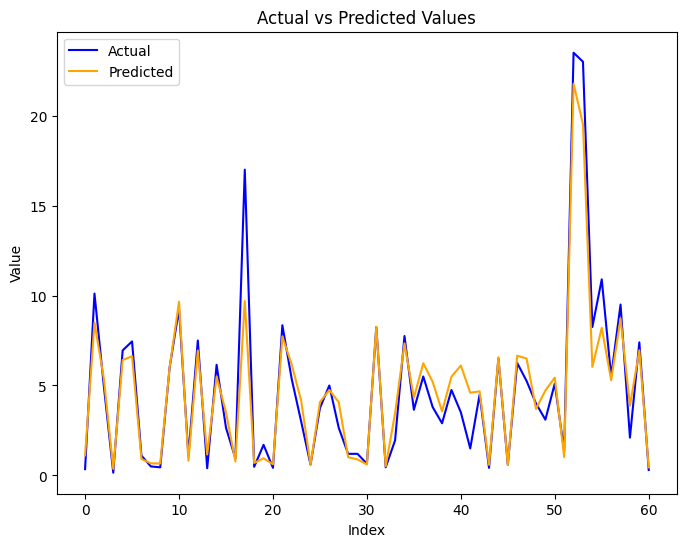

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()